In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [250]:
df=pd.read_csv('Walmart_Sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [251]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [252]:
df.drop('Date',axis=1,inplace=True)
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,718125.53,0,56.47,3.969,192.330854,8.667


In [253]:
X=df[['Unemployment','Holiday_Flag','Temperature','CPI']]
y=df['Weekly_Sales']

In [254]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.1,random_state=40)

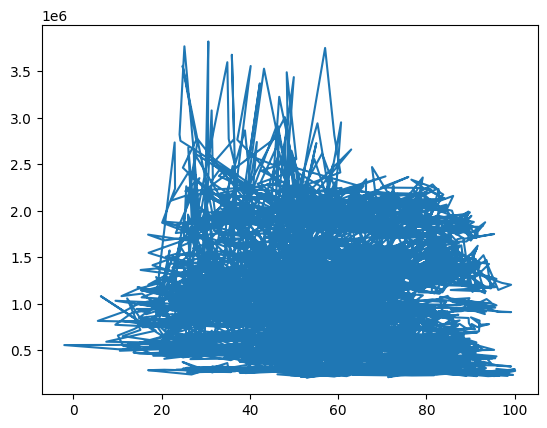

In [255]:
plt.plot(X['Temperature'],y)

In [256]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
std=s.fit_transform(Xtrain)


In [257]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=5)
xpoly=poly.fit_transform(std)
xpoly

array([[ 1.        , -0.07614009, -0.27312342, ...,  0.24049479,
         0.31066297,  0.40130383],
       [ 1.        ,  0.01182103, -0.27312342, ..., -0.44398489,
        -0.49153212, -0.54417129],
       [ 1.        , -1.82043581, -0.27312342, ..., -0.03582033,
         0.14331837, -0.57342173],
       ...,
       [ 1.        ,  0.06406461, -0.27312342, ..., -2.76082493,
        -2.33691806, -1.97809936],
       [ 1.        ,  0.27836989, -0.27312342, ...,  0.01010308,
         0.00765486,  0.0057999 ],
       [ 1.        ,  0.35193738, -0.27312342, ..., -0.70405494,
        -0.58746558, -0.49018307]], shape=(5791, 126))

In [258]:
model=LinearRegression()
model.fit(xpoly,Ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [259]:
std1=s.transform(Xtest)
xtest_poly=poly.transform(std1)
pred=model.predict(xtest_poly)
pred

array([ 912622.41443486, 1149248.49906999,  676914.28680373,
       1266254.61546193,  610787.75144161, 1021010.15735835,
       1155818.09533338, 1281229.95700626,  329620.68250341,
       1273899.16425788,  703324.8479784 , 1197134.77102597,
       1004539.28133461, 1026945.4159463 , 1045063.55871763,
       1199296.15679155, 1212693.54412927, 1015326.94368124,
       1331379.69515276, 1089522.99923584, 1077030.5899861 ,
       1120984.76253086, 1497466.18301533, 1141901.4034813 ,
       1179391.9081839 ,  985366.14005729, 1215192.44072512,
        721659.81119172, 1378720.00765558, 1181141.441653  ,
       1281556.06644158, 1219660.06922833, 1185181.94598279,
       1179157.3752358 , 1012895.36894995, 1146846.63221225,
       1321083.97243357, 2063482.76972797, 1199710.27873759,
       1068967.8172346 ,  766687.42235631,  877522.46585305,
       1111201.5267183 , 1030381.43287467, 1179972.76258858,
       1120556.20693364,  978253.25169161,  718830.58968625,
        527133.67731309,

In [260]:
model.score(xtest_poly,Ytest)

0.09631082448575157

In [261]:
from sklearn.metrics import r2_score
r2_score(Ytest,pred)

0.09631082448575157